# LÀM SẠCH DỮ LIỆU
Dữ liệu đã được tải xuống máy tính từ World Bank với định dạng .csv


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
#Download file đã tải từ máy tính lên
df = pd.read_csv("Data WorldBank.csv")
print(df)

          Country Name Country Code  \
0    Brunei Darussalam          BRN   
1    Brunei Darussalam          BRN   
2    Brunei Darussalam          BRN   
3    Brunei Darussalam          BRN   
4    Brunei Darussalam          BRN   
..                 ...          ...   
145            Ireland          IRL   
146            Ireland          IRL   
147            Ireland          IRL   
148            Ireland          IRL   
149            Ireland          IRL   

                                           Series Name        Series Code  \
0                                    GDP (current US$)     NY.GDP.MKTP.CD   
1    Official exchange rate (LCU per US$, period av...        PA.NUS.FCRF   
2                               Broad money (% of GDP)  FM.LBL.BMNY.GD.ZS   
3                   Inflation, GDP deflator (annual %)  NY.GDP.DEFL.KD.ZG   
4    Unemployment, total (% of total labor force) (...     SL.UEM.TOTL.ZS   
..                                                 ...               

In [3]:
#Xem dữ liệu GDP của các nước
data_GDP = df[df['Series Name'].isin(['GDP (current US$)'])]
print(data_GDP)

           Country Name Country Code        Series Name     Series Code  \
0     Brunei Darussalam          BRN  GDP (current US$)  NY.GDP.MKTP.CD   
6              Cambodia          KHM  GDP (current US$)  NY.GDP.MKTP.CD   
12          Timor-Leste          TLS  GDP (current US$)  NY.GDP.MKTP.CD   
18            Indonesia          IDN  GDP (current US$)  NY.GDP.MKTP.CD   
24              Lao PDR          LAO  GDP (current US$)  NY.GDP.MKTP.CD   
30             Malaysia          MYS  GDP (current US$)  NY.GDP.MKTP.CD   
36              Myanmar          MMR  GDP (current US$)  NY.GDP.MKTP.CD   
42          Philippines          PHL  GDP (current US$)  NY.GDP.MKTP.CD   
48            Singapore          SGP  GDP (current US$)  NY.GDP.MKTP.CD   
54             Thailand          THA  GDP (current US$)  NY.GDP.MKTP.CD   
60             Viet Nam          VNM  GDP (current US$)  NY.GDP.MKTP.CD   
66                China          CHN  GDP (current US$)  NY.GDP.MKTP.CD   
72                Japan  

# Sắp xếp lại bảng sao cho phù hợp

In [4]:
#Sắp xếp lại bảng
id_vars = ["Country Name","Country Code", "Series Name", "Series Code"]
a = pd.melt(frame=data_GDP, id_vars=id_vars, var_name='Year', value_name='GDP')
print(a)

           Country Name Country Code        Series Name     Series Code  \
0     Brunei Darussalam          BRN  GDP (current US$)  NY.GDP.MKTP.CD   
1              Cambodia          KHM  GDP (current US$)  NY.GDP.MKTP.CD   
2           Timor-Leste          TLS  GDP (current US$)  NY.GDP.MKTP.CD   
3             Indonesia          IDN  GDP (current US$)  NY.GDP.MKTP.CD   
4               Lao PDR          LAO  GDP (current US$)  NY.GDP.MKTP.CD   
..                  ...          ...                ...             ...   
370  Russian Federation          RUS  GDP (current US$)  NY.GDP.MKTP.CD   
371             Germany          DEU  GDP (current US$)  NY.GDP.MKTP.CD   
372           Australia          AUS  GDP (current US$)  NY.GDP.MKTP.CD   
373             Hungary          HUN  GDP (current US$)  NY.GDP.MKTP.CD   
374             Ireland          IRL  GDP (current US$)  NY.GDP.MKTP.CD   

              Year           GDP  
0    2008 [YR2008]  1.439343e+10  
1    2008 [YR2008]  1.035191e

In [5]:
#Đổi tên cột, vì ở dưới sẽ dùng hàm concat để gộp các cột lại với nhau -> sẽ xuất hiện cột bị lặp nên đổi tên để dễ phân biệtb
change1 = a.rename(columns={'Series Code':'Series Code 1','Series Name':'Series Name 1','Country Code':'Country Code 1'})
print(change1)

           Country Name Country Code 1      Series Name 1   Series Code 1  \
0     Brunei Darussalam            BRN  GDP (current US$)  NY.GDP.MKTP.CD   
1              Cambodia            KHM  GDP (current US$)  NY.GDP.MKTP.CD   
2           Timor-Leste            TLS  GDP (current US$)  NY.GDP.MKTP.CD   
3             Indonesia            IDN  GDP (current US$)  NY.GDP.MKTP.CD   
4               Lao PDR            LAO  GDP (current US$)  NY.GDP.MKTP.CD   
..                  ...            ...                ...             ...   
370  Russian Federation            RUS  GDP (current US$)  NY.GDP.MKTP.CD   
371             Germany            DEU  GDP (current US$)  NY.GDP.MKTP.CD   
372           Australia            AUS  GDP (current US$)  NY.GDP.MKTP.CD   
373             Hungary            HUN  GDP (current US$)  NY.GDP.MKTP.CD   
374             Ireland            IRL  GDP (current US$)  NY.GDP.MKTP.CD   

              Year           GDP  
0    2008 [YR2008]  1.439343e+10  
1    

In [6]:
data_Inflation = df[df['Series Name'].isin(['Inflation, GDP deflator (annual %)'])]
print(data_Inflation)

           Country Name Country Code                         Series Name  \
3     Brunei Darussalam          BRN  Inflation, GDP deflator (annual %)   
9              Cambodia          KHM  Inflation, GDP deflator (annual %)   
15          Timor-Leste          TLS  Inflation, GDP deflator (annual %)   
21            Indonesia          IDN  Inflation, GDP deflator (annual %)   
27              Lao PDR          LAO  Inflation, GDP deflator (annual %)   
33             Malaysia          MYS  Inflation, GDP deflator (annual %)   
39              Myanmar          MMR  Inflation, GDP deflator (annual %)   
45          Philippines          PHL  Inflation, GDP deflator (annual %)   
51            Singapore          SGP  Inflation, GDP deflator (annual %)   
57             Thailand          THA  Inflation, GDP deflator (annual %)   
63             Viet Nam          VNM  Inflation, GDP deflator (annual %)   
69                China          CHN  Inflation, GDP deflator (annual %)   
75          

In [7]:
id_vars_1 = ["Country Name","Country Code", "Series Name", "Series Code"]
b = pd.melt(frame=data_Inflation, id_vars=id_vars, var_name='Year', value_name='Inflation')
print(b)

           Country Name Country Code                         Series Name  \
0     Brunei Darussalam          BRN  Inflation, GDP deflator (annual %)   
1              Cambodia          KHM  Inflation, GDP deflator (annual %)   
2           Timor-Leste          TLS  Inflation, GDP deflator (annual %)   
3             Indonesia          IDN  Inflation, GDP deflator (annual %)   
4               Lao PDR          LAO  Inflation, GDP deflator (annual %)   
..                  ...          ...                                 ...   
370  Russian Federation          RUS  Inflation, GDP deflator (annual %)   
371             Germany          DEU  Inflation, GDP deflator (annual %)   
372           Australia          AUS  Inflation, GDP deflator (annual %)   
373             Hungary          HUN  Inflation, GDP deflator (annual %)   
374             Ireland          IRL  Inflation, GDP deflator (annual %)   

           Series Code           Year  Inflation  
0    NY.GDP.DEFL.KD.ZG  2008 [YR2008

In [8]:
change2 = b.rename(columns={'Series Code':'Series Code 2','Series Name':'Series Name 2','Country Code':'Country Code 2','Country Name':'Country Name 2', 'Year':'Year 2'})
print(change2)

         Country Name 2 Country Code 2                       Series Name 2  \
0     Brunei Darussalam            BRN  Inflation, GDP deflator (annual %)   
1              Cambodia            KHM  Inflation, GDP deflator (annual %)   
2           Timor-Leste            TLS  Inflation, GDP deflator (annual %)   
3             Indonesia            IDN  Inflation, GDP deflator (annual %)   
4               Lao PDR            LAO  Inflation, GDP deflator (annual %)   
..                  ...            ...                                 ...   
370  Russian Federation            RUS  Inflation, GDP deflator (annual %)   
371             Germany            DEU  Inflation, GDP deflator (annual %)   
372           Australia            AUS  Inflation, GDP deflator (annual %)   
373             Hungary            HUN  Inflation, GDP deflator (annual %)   
374             Ireland            IRL  Inflation, GDP deflator (annual %)   

         Series Code 2         Year 2  Inflation  
0    NY.GDP.

In [9]:
#Ghép bảng 1 vào bảng 2 (Bảng GDP và Bảng Inflation)
merge1 = pd.concat([change1, change2], axis=1)
print(merge1)

           Country Name Country Code 1      Series Name 1   Series Code 1  \
0     Brunei Darussalam            BRN  GDP (current US$)  NY.GDP.MKTP.CD   
1              Cambodia            KHM  GDP (current US$)  NY.GDP.MKTP.CD   
2           Timor-Leste            TLS  GDP (current US$)  NY.GDP.MKTP.CD   
3             Indonesia            IDN  GDP (current US$)  NY.GDP.MKTP.CD   
4               Lao PDR            LAO  GDP (current US$)  NY.GDP.MKTP.CD   
..                  ...            ...                ...             ...   
370  Russian Federation            RUS  GDP (current US$)  NY.GDP.MKTP.CD   
371             Germany            DEU  GDP (current US$)  NY.GDP.MKTP.CD   
372           Australia            AUS  GDP (current US$)  NY.GDP.MKTP.CD   
373             Hungary            HUN  GDP (current US$)  NY.GDP.MKTP.CD   
374             Ireland            IRL  GDP (current US$)  NY.GDP.MKTP.CD   

              Year           GDP      Country Name 2 Country Code 2  \
0   

In [10]:
#Bỏ bớt các cột trùng tên
table1 = merge1.drop(['Country Code 1', 'Series Name 1', 'Series Code 1','Country Code 2','Series Name 2','Series Code 2','Country Name 2','Year 2'], axis=1)
print(table1)

           Country Name           Year           GDP  Inflation
0     Brunei Darussalam  2008 [YR2008]  1.439343e+10  12.692730
1              Cambodia  2008 [YR2008]  1.035191e+10  12.253787
2           Timor-Leste  2008 [YR2008]  6.485236e+08   7.256764
3             Indonesia  2008 [YR2008]  5.100000e+11  18.149751
4               Lao PDR  2008 [YR2008]  5.446434e+09   8.863451
..                  ...            ...           ...        ...
370  Russian Federation  2022 [YR2022]  2.240000e+12  15.804710
371             Germany  2022 [YR2022]  4.080000e+12   5.268325
372           Australia  2022 [YR2022]  1.690000e+12   7.123076
373             Hungary  2022 [YR2022]  1.770000e+11  14.489279
374             Ireland  2022 [YR2022]  5.330000e+11   6.582264

[375 rows x 4 columns]


Phần dưới tương tự phần ở trên

Phần dưới làm tương tự như trên

In [11]:
data_exchange_rate = df[df['Series Name'].isin(['Official exchange rate (LCU per US$, period average)'])]
print(data_exchange_rate)

           Country Name Country Code  \
1     Brunei Darussalam          BRN   
7              Cambodia          KHM   
13          Timor-Leste          TLS   
19            Indonesia          IDN   
25              Lao PDR          LAO   
31             Malaysia          MYS   
37              Myanmar          MMR   
43          Philippines          PHL   
49            Singapore          SGP   
55             Thailand          THA   
61             Viet Nam          VNM   
67                China          CHN   
73                Japan          JPN   
79          Korea, Rep.          KOR   
85                India          IND   
91           Uzbekistan          UZB   
97                Qatar          QAT   
103       United States          USA   
109      United Kingdom          GBR   
115              France          FRA   
121  Russian Federation          RUS   
127             Germany          DEU   
133           Australia          AUS   
139             Hungary          HUN   


In [12]:
id_vars_2 = ["Country Name","Country Code", "Series Name", "Series Code"]
c = pd.melt(frame=data_exchange_rate, id_vars=id_vars, var_name='Year', value_name='Exchange Rate')
print(c)

           Country Name Country Code  \
0     Brunei Darussalam          BRN   
1              Cambodia          KHM   
2           Timor-Leste          TLS   
3             Indonesia          IDN   
4               Lao PDR          LAO   
..                  ...          ...   
370  Russian Federation          RUS   
371             Germany          DEU   
372           Australia          AUS   
373             Hungary          HUN   
374             Ireland          IRL   

                                           Series Name  Series Code  \
0    Official exchange rate (LCU per US$, period av...  PA.NUS.FCRF   
1    Official exchange rate (LCU per US$, period av...  PA.NUS.FCRF   
2    Official exchange rate (LCU per US$, period av...  PA.NUS.FCRF   
3    Official exchange rate (LCU per US$, period av...  PA.NUS.FCRF   
4    Official exchange rate (LCU per US$, period av...  PA.NUS.FCRF   
..                                                 ...          ...   
370  Official exchange

In [13]:
change3 = c.rename(columns={'Series Code':'Series Code 3','Series Name':'Series Name 3','Country Code':'Country Code 3','Country Name':'Country Name 3', 'Year':'Year 3'})
print(change3)

         Country Name 3 Country Code 3  \
0     Brunei Darussalam            BRN   
1              Cambodia            KHM   
2           Timor-Leste            TLS   
3             Indonesia            IDN   
4               Lao PDR            LAO   
..                  ...            ...   
370  Russian Federation            RUS   
371             Germany            DEU   
372           Australia            AUS   
373             Hungary            HUN   
374             Ireland            IRL   

                                         Series Name 3 Series Code 3  \
0    Official exchange rate (LCU per US$, period av...   PA.NUS.FCRF   
1    Official exchange rate (LCU per US$, period av...   PA.NUS.FCRF   
2    Official exchange rate (LCU per US$, period av...   PA.NUS.FCRF   
3    Official exchange rate (LCU per US$, period av...   PA.NUS.FCRF   
4    Official exchange rate (LCU per US$, period av...   PA.NUS.FCRF   
..                                                 ...         

In [14]:
data_money_supply = df[df['Series Name'].isin(['Broad money (% of GDP)'])]
print(data_money_supply)

           Country Name Country Code             Series Name  \
2     Brunei Darussalam          BRN  Broad money (% of GDP)   
8              Cambodia          KHM  Broad money (% of GDP)   
14          Timor-Leste          TLS  Broad money (% of GDP)   
20            Indonesia          IDN  Broad money (% of GDP)   
26              Lao PDR          LAO  Broad money (% of GDP)   
32             Malaysia          MYS  Broad money (% of GDP)   
38              Myanmar          MMR  Broad money (% of GDP)   
44          Philippines          PHL  Broad money (% of GDP)   
50            Singapore          SGP  Broad money (% of GDP)   
56             Thailand          THA  Broad money (% of GDP)   
62             Viet Nam          VNM  Broad money (% of GDP)   
68                China          CHN  Broad money (% of GDP)   
74                Japan          JPN  Broad money (% of GDP)   
80          Korea, Rep.          KOR  Broad money (% of GDP)   
86                India          IND  Br

In [15]:
id_vars_3 = ["Country Name","Country Code", "Series Name", "Series Code"]
d = pd.melt(frame=data_money_supply, id_vars=id_vars, var_name='Year', value_name='Money Supply')
print(d)

           Country Name Country Code             Series Name  \
0     Brunei Darussalam          BRN  Broad money (% of GDP)   
1              Cambodia          KHM  Broad money (% of GDP)   
2           Timor-Leste          TLS  Broad money (% of GDP)   
3             Indonesia          IDN  Broad money (% of GDP)   
4               Lao PDR          LAO  Broad money (% of GDP)   
..                  ...          ...                     ...   
370  Russian Federation          RUS  Broad money (% of GDP)   
371             Germany          DEU  Broad money (% of GDP)   
372           Australia          AUS  Broad money (% of GDP)   
373             Hungary          HUN  Broad money (% of GDP)   
374             Ireland          IRL  Broad money (% of GDP)   

           Series Code           Year  Money Supply  
0    FM.LBL.BMNY.GD.ZS  2008 [YR2008]     53.632941  
1    FM.LBL.BMNY.GD.ZS  2008 [YR2008]     28.360056  
2    FM.LBL.BMNY.GD.ZS  2008 [YR2008]     29.707192  
3    FM.LBL.BMN

In [16]:
change4 = d.rename(columns={'Series Code':'Series Code 4','Series Name':'Series Name 4','Country Code':'Country Code 4','Country Name':'Country Name 4', 'Year':'Year 4'})
print(change4)

         Country Name 4 Country Code 4           Series Name 4  \
0     Brunei Darussalam            BRN  Broad money (% of GDP)   
1              Cambodia            KHM  Broad money (% of GDP)   
2           Timor-Leste            TLS  Broad money (% of GDP)   
3             Indonesia            IDN  Broad money (% of GDP)   
4               Lao PDR            LAO  Broad money (% of GDP)   
..                  ...            ...                     ...   
370  Russian Federation            RUS  Broad money (% of GDP)   
371             Germany            DEU  Broad money (% of GDP)   
372           Australia            AUS  Broad money (% of GDP)   
373             Hungary            HUN  Broad money (% of GDP)   
374             Ireland            IRL  Broad money (% of GDP)   

         Series Code 4         Year 4  Money Supply  
0    FM.LBL.BMNY.GD.ZS  2008 [YR2008]     53.632941  
1    FM.LBL.BMNY.GD.ZS  2008 [YR2008]     28.360056  
2    FM.LBL.BMNY.GD.ZS  2008 [YR2008]     29.

In [17]:
merge2 = pd.concat([change3, change4], axis=1)
print(merge2)

         Country Name 3 Country Code 3  \
0     Brunei Darussalam            BRN   
1              Cambodia            KHM   
2           Timor-Leste            TLS   
3             Indonesia            IDN   
4               Lao PDR            LAO   
..                  ...            ...   
370  Russian Federation            RUS   
371             Germany            DEU   
372           Australia            AUS   
373             Hungary            HUN   
374             Ireland            IRL   

                                         Series Name 3 Series Code 3  \
0    Official exchange rate (LCU per US$, period av...   PA.NUS.FCRF   
1    Official exchange rate (LCU per US$, period av...   PA.NUS.FCRF   
2    Official exchange rate (LCU per US$, period av...   PA.NUS.FCRF   
3    Official exchange rate (LCU per US$, period av...   PA.NUS.FCRF   
4    Official exchange rate (LCU per US$, period av...   PA.NUS.FCRF   
..                                                 ...         

In [18]:
#Ghép 2 bảng 3 và 4 với nhau (Bảng Unemployment và Bảng CPI )
table2 = merge2.drop(['Country Code 3', 'Series Name 3', 'Series Code 3','Country Code 4','Series Name 4','Series Code 4','Country Name 4','Year 4','Year 3','Country Name 3'], axis=1)
print(table2)

     Exchange Rate  Money Supply
0         1.417167     53.632941
1      4054.166667     28.360056
2         1.000000     29.707192
3      9698.962500     38.309921
4      8740.181403     24.292577
..             ...           ...
370      68.484942           NaN
371            NaN           NaN
372       1.441664    134.202801
373     372.595833     65.282099
374            NaN           NaN

[375 rows x 2 columns]


In [19]:
data_unemployment = df[df['Series Name'].isin(['Unemployment, total (% of total labor force) (modeled ILO estimate)'])]
print(data_unemployment)

           Country Name Country Code  \
4     Brunei Darussalam          BRN   
10             Cambodia          KHM   
16          Timor-Leste          TLS   
22            Indonesia          IDN   
28              Lao PDR          LAO   
34             Malaysia          MYS   
40              Myanmar          MMR   
46          Philippines          PHL   
52            Singapore          SGP   
58             Thailand          THA   
64             Viet Nam          VNM   
70                China          CHN   
76                Japan          JPN   
82          Korea, Rep.          KOR   
88                India          IND   
94           Uzbekistan          UZB   
100               Qatar          QAT   
106       United States          USA   
112      United Kingdom          GBR   
118              France          FRA   
124  Russian Federation          RUS   
130             Germany          DEU   
136           Australia          AUS   
142             Hungary          HUN   


In [20]:
id_vars_4 = ["Country Name","Country Code", "Series Name", "Series Code"]
e = pd.melt(frame=data_unemployment, id_vars=id_vars, var_name='Year', value_name='Unemployment')
print(e)

           Country Name Country Code  \
0     Brunei Darussalam          BRN   
1              Cambodia          KHM   
2           Timor-Leste          TLS   
3             Indonesia          IDN   
4               Lao PDR          LAO   
..                  ...          ...   
370  Russian Federation          RUS   
371             Germany          DEU   
372           Australia          AUS   
373             Hungary          HUN   
374             Ireland          IRL   

                                           Series Name     Series Code  \
0    Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
1    Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
2    Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
3    Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
4    Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
..                                                 ...             ...   
3

In [21]:
change5 = e.rename(columns={'Series Code':'Series Code 5','Series Name':'Series Name 5','Country Code':'Country Code 5','Country Name':'Country Name 5', 'Year':'Year 5'})
print(change5)

         Country Name 5 Country Code 5  \
0     Brunei Darussalam            BRN   
1              Cambodia            KHM   
2           Timor-Leste            TLS   
3             Indonesia            IDN   
4               Lao PDR            LAO   
..                  ...            ...   
370  Russian Federation            RUS   
371             Germany            DEU   
372           Australia            AUS   
373             Hungary            HUN   
374             Ireland            IRL   

                                         Series Name 5   Series Code 5  \
0    Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
1    Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
2    Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
3    Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
4    Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
..                                                 

In [22]:
data_FDI = df[df['Series Name'].isin(['Foreign direct investment, net (BoP, current US$)'])]
print(data_FDI)

           Country Name Country Code  \
5     Brunei Darussalam          BRN   
11             Cambodia          KHM   
17          Timor-Leste          TLS   
23            Indonesia          IDN   
29              Lao PDR          LAO   
35             Malaysia          MYS   
41              Myanmar          MMR   
47          Philippines          PHL   
53            Singapore          SGP   
59             Thailand          THA   
65             Viet Nam          VNM   
71                China          CHN   
77                Japan          JPN   
83          Korea, Rep.          KOR   
89                India          IND   
95           Uzbekistan          UZB   
101               Qatar          QAT   
107       United States          USA   
113      United Kingdom          GBR   
119              France          FRA   
125  Russian Federation          RUS   
131             Germany          DEU   
137           Australia          AUS   
143             Hungary          HUN   


In [23]:
id_vars_5 = ["Country Name","Country Code", "Series Name", "Series Code"]
f = pd.melt(frame=data_FDI, id_vars=id_vars, var_name='Year', value_name='FDI')
print(f)

           Country Name Country Code  \
0     Brunei Darussalam          BRN   
1              Cambodia          KHM   
2           Timor-Leste          TLS   
3             Indonesia          IDN   
4               Lao PDR          LAO   
..                  ...          ...   
370  Russian Federation          RUS   
371             Germany          DEU   
372           Australia          AUS   
373             Hungary          HUN   
374             Ireland          IRL   

                                           Series Name     Series Code  \
0    Foreign direct investment, net (BoP, current US$)  BN.KLT.DINV.CD   
1    Foreign direct investment, net (BoP, current US$)  BN.KLT.DINV.CD   
2    Foreign direct investment, net (BoP, current US$)  BN.KLT.DINV.CD   
3    Foreign direct investment, net (BoP, current US$)  BN.KLT.DINV.CD   
4    Foreign direct investment, net (BoP, current US$)  BN.KLT.DINV.CD   
..                                                 ...             ...   
3

In [24]:
change6 = f.rename(columns={'Series Code':'Series Code 6','Series Name':'Series Name 6','Country Code':'Country Code 6','Country Name':'Country Name 6', 'Year':'Year 6'})
print(change6)

         Country Name 6 Country Code 6  \
0     Brunei Darussalam            BRN   
1              Cambodia            KHM   
2           Timor-Leste            TLS   
3             Indonesia            IDN   
4               Lao PDR            LAO   
..                  ...            ...   
370  Russian Federation            RUS   
371             Germany            DEU   
372           Australia            AUS   
373             Hungary            HUN   
374             Ireland            IRL   

                                         Series Name 6   Series Code 6  \
0    Foreign direct investment, net (BoP, current US$)  BN.KLT.DINV.CD   
1    Foreign direct investment, net (BoP, current US$)  BN.KLT.DINV.CD   
2    Foreign direct investment, net (BoP, current US$)  BN.KLT.DINV.CD   
3    Foreign direct investment, net (BoP, current US$)  BN.KLT.DINV.CD   
4    Foreign direct investment, net (BoP, current US$)  BN.KLT.DINV.CD   
..                                                 

In [25]:
merge3 = pd.concat([change5, change6], axis=1)
print(merge3)

         Country Name 5 Country Code 5  \
0     Brunei Darussalam            BRN   
1              Cambodia            KHM   
2           Timor-Leste            TLS   
3             Indonesia            IDN   
4               Lao PDR            LAO   
..                  ...            ...   
370  Russian Federation            RUS   
371             Germany            DEU   
372           Australia            AUS   
373             Hungary            HUN   
374             Ireland            IRL   

                                         Series Name 5   Series Code 5  \
0    Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
1    Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
2    Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
3    Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
4    Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
..                                                 

In [26]:
table3 = merge3.drop(['Country Code 5', 'Series Name 5', 'Series Code 5','Country Name 5','Series Name 6','Series Code 6','Country Name 6','Year 6','Year 5','Country Code 6'], axis=1)
print(table3)

     Unemployment           FDI
0           6.293 -2.221845e+08
1           0.820 -7.946914e+08
2           3.362 -3.969797e+07
3           7.210 -3.418723e+09
4           0.943 -2.277700e+08
..            ...           ...
370         3.867  2.696770e+10
371         3.140  1.310000e+11
372         3.700  5.425863e+10
373         3.610 -3.886946e+09
374         4.480  3.568870e+10

[375 rows x 2 columns]


In [27]:
#Ghép các bảng vào với nhau, tạo thành bảng cuối cùng
final_table = pd.concat([table1, table2, table3], axis=1)
print(final_table)

           Country Name           Year           GDP  Inflation  \
0     Brunei Darussalam  2008 [YR2008]  1.439343e+10  12.692730   
1              Cambodia  2008 [YR2008]  1.035191e+10  12.253787   
2           Timor-Leste  2008 [YR2008]  6.485236e+08   7.256764   
3             Indonesia  2008 [YR2008]  5.100000e+11  18.149751   
4               Lao PDR  2008 [YR2008]  5.446434e+09   8.863451   
..                  ...            ...           ...        ...   
370  Russian Federation  2022 [YR2022]  2.240000e+12  15.804710   
371             Germany  2022 [YR2022]  4.080000e+12   5.268325   
372           Australia  2022 [YR2022]  1.690000e+12   7.123076   
373             Hungary  2022 [YR2022]  1.770000e+11  14.489279   
374             Ireland  2022 [YR2022]  5.330000e+11   6.582264   

     Exchange Rate  Money Supply  Unemployment           FDI  
0         1.417167     53.632941         6.293 -2.221845e+08  
1      4054.166667     28.360056         0.820 -7.946914e+08  
2     

In [28]:
print(final_table.isnull().sum())

Country Name      0
Year              0
GDP               0
Inflation         0
Exchange Rate    52
Money Supply     70
Unemployment      0
FDI               6
dtype: int64


In [29]:
#Thay đổi các ô dữ liệu NaN bằng cách lấy trung bình các giá trị trong cột để thay thế NaN
final_table["Exchange Rate"].fillna(final_table["Exchange Rate"].mean(), inplace = True)
final_table["Money Supply"].fillna(final_table["Money Supply"].mean(), inplace = True)
final_table["FDI"].fillna(final_table["FDI"].mean(), inplace = True)
print(final_table)

           Country Name           Year           GDP  Inflation  \
0     Brunei Darussalam  2008 [YR2008]  1.439343e+10  12.692730   
1              Cambodia  2008 [YR2008]  1.035191e+10  12.253787   
2           Timor-Leste  2008 [YR2008]  6.485236e+08   7.256764   
3             Indonesia  2008 [YR2008]  5.100000e+11  18.149751   
4               Lao PDR  2008 [YR2008]  5.446434e+09   8.863451   
..                  ...            ...           ...        ...   
370  Russian Federation  2022 [YR2022]  2.240000e+12  15.804710   
371             Germany  2022 [YR2022]  4.080000e+12   5.268325   
372           Australia  2022 [YR2022]  1.690000e+12   7.123076   
373             Hungary  2022 [YR2022]  1.770000e+11  14.489279   
374             Ireland  2022 [YR2022]  5.330000e+11   6.582264   

     Exchange Rate  Money Supply  Unemployment           FDI  
0         1.417167     53.632941         6.293 -2.221845e+08  
1      4054.166667     28.360056         0.820 -7.946914e+08  
2     

In [30]:
print(final_table.head())

        Country Name           Year           GDP  Inflation  Exchange Rate  \
0  Brunei Darussalam  2008 [YR2008]  1.439343e+10  12.692730       1.417167   
1           Cambodia  2008 [YR2008]  1.035191e+10  12.253787    4054.166667   
2        Timor-Leste  2008 [YR2008]  6.485236e+08   7.256764       1.000000   
3          Indonesia  2008 [YR2008]  5.100000e+11  18.149751    9698.962500   
4            Lao PDR  2008 [YR2008]  5.446434e+09   8.863451    8740.181403   

   Money Supply  Unemployment           FDI  
0     53.632941         6.293 -2.221845e+08  
1     28.360056         0.820 -7.946914e+08  
2     29.707192         3.362 -3.969797e+07  
3     38.309921         7.210 -3.418723e+09  
4     24.292577         0.943 -2.277700e+08  


In [31]:
#Thay đổi các giá trị trong cột 'Year'
final_table.loc[final_table['Year'] == '2008 [YR2008]', 'Year'] = '2008'
final_table.loc[final_table['Year'] == '2009 [YR2009]', 'Year'] = '2009'
final_table.loc[final_table['Year'] == '2010 [YR2010]', 'Year'] = '2010'
final_table.loc[final_table['Year'] == '2011 [YR2011]', 'Year'] = '2011'
final_table.loc[final_table['Year'] == '2012 [YR2012]', 'Year'] = '2012'
final_table.loc[final_table['Year'] == '2013 [YR2013]', 'Year'] = '2013'
final_table.loc[final_table['Year'] == '2014 [YR2014]', 'Year'] = '2014'
final_table.loc[final_table['Year'] == '2015 [YR2015]', 'Year'] = '2015'
final_table.loc[final_table['Year'] == '2016 [YR2016]', 'Year'] = '2016'
final_table.loc[final_table['Year'] == '2017 [YR2017]', 'Year'] = '2017'
final_table.loc[final_table['Year'] == '2018 [YR2018]', 'Year'] = '2018'
final_table.loc[final_table['Year'] == '2019 [YR2019]', 'Year'] = '2019'
final_table.loc[final_table['Year'] == '2020 [YR2020]', 'Year'] = '2020'
final_table.loc[final_table['Year'] == '2021 [YR2021]', 'Year'] = '2021'
final_table.loc[final_table['Year'] == '2022 [YR2022]', 'Year'] = '2022'
print(final_table)

           Country Name  Year           GDP  Inflation  Exchange Rate  \
0     Brunei Darussalam  2008  1.439343e+10  12.692730       1.417167   
1              Cambodia  2008  1.035191e+10  12.253787    4054.166667   
2           Timor-Leste  2008  6.485236e+08   7.256764       1.000000   
3             Indonesia  2008  5.100000e+11  18.149751    9698.962500   
4               Lao PDR  2008  5.446434e+09   8.863451    8740.181403   
..                  ...   ...           ...        ...            ...   
370  Russian Federation  2022  2.240000e+12  15.804710      68.484942   
371             Germany  2022  4.080000e+12   5.268325    2450.739405   
372           Australia  2022  1.690000e+12   7.123076       1.441664   
373             Hungary  2022  1.770000e+11  14.489279     372.595833   
374             Ireland  2022  5.330000e+11   6.582264    2450.739405   

     Money Supply  Unemployment           FDI  
0       53.632941         6.293 -2.221845e+08  
1       28.360056         0

In [32]:
#Tải file đã chỉnh sửa về máy ở dạng excel
final_table.to_excel('data 5 fix.xlsx')

In [33]:
#Tải file đã chỉnh sửa về máy ở dạng file.csv
final_table.to_csv('Data WorldBank fix.csv')

In [34]:
#Kiểm tra xem còn giá trị NaN không
print(final_table.isnull().sum())

Country Name     0
Year             0
GDP              0
Inflation        0
Exchange Rate    0
Money Supply     0
Unemployment     0
FDI              0
dtype: int64


<Axes: xlabel='GDP', ylabel='Count'>

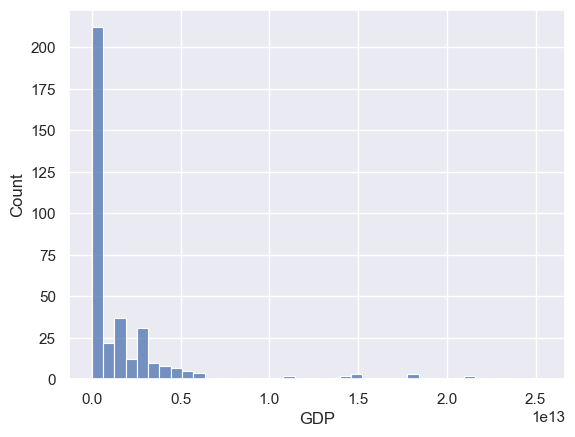

In [35]:
#Vẽ đồ thị dạng cột xem GDP phân bố ở mức nào
sns.histplot(data=final_table['GDP'])

<Axes: xlabel='GDP', ylabel='Density'>

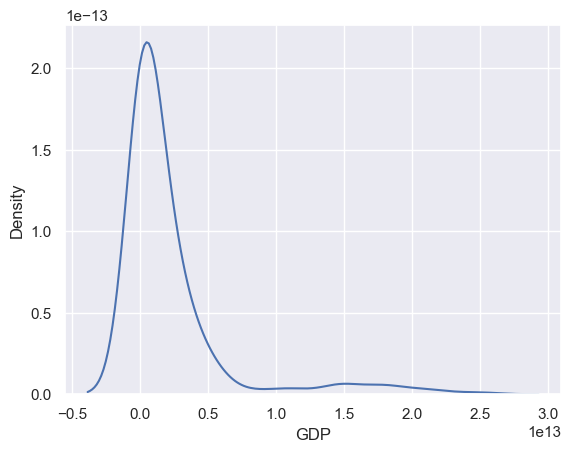

In [36]:
sns.kdeplot(data=final_table['GDP'])
#sns.kdeplot(data=final_table['Inflation'])

C:\Users\nguye\AppData\Local\Temp\ipykernel_27112\425816951.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(final_table.corr(), annot = True, lw = 1, linecolor = 'r', cmap = 'coolwarm')


<Axes: >

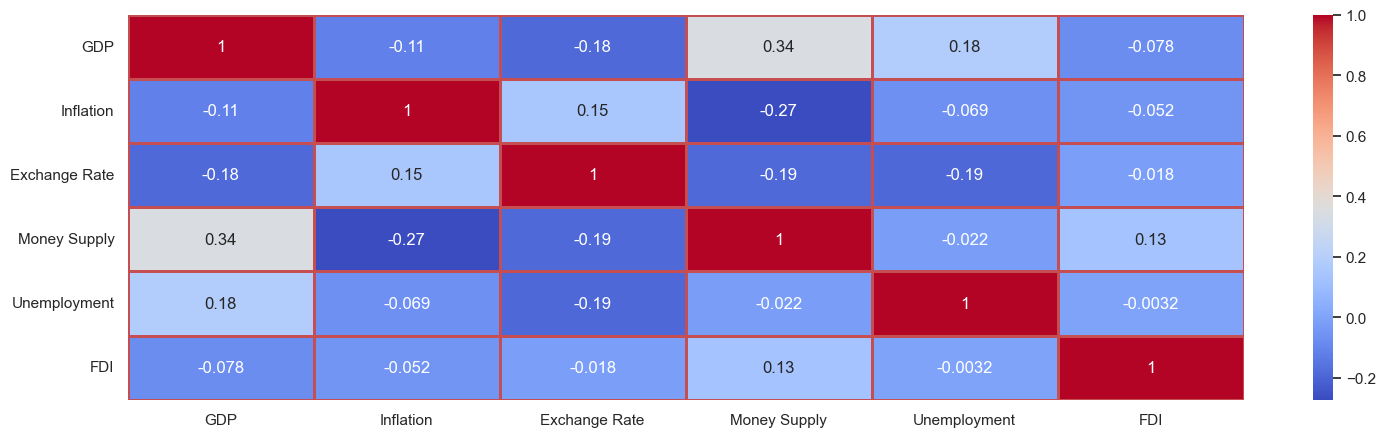

In [37]:
plt.figure(figsize=(18, 5))
sns.heatmap(final_table.corr(), annot = True, lw = 1, linecolor = 'r', cmap = 'coolwarm')

# Tiền xử lý dữ liệu

Chia bộ dữ liệu thành 3 phần: Train, Valid, Test theo tỷ lệ: 68%, 12% và 20%. Không nên để tỷ lệ dữ liệu cho Test nhỏ hơn 10% số mẫu của toàn bộ dữ liệu

In [38]:
X_train, X_test = train_test_split(final_table, test_size=0.2,shuffle=True, random_state=144)

In [39]:
X_train.shape, X_test.shape

((300, 8), (75, 8))

In [40]:
X_train, X_valid = train_test_split(X_train, test_size=0.15,shuffle=True, random_state=144)

In [41]:
y_train = X_train["GDP"].copy()
y_valid = X_valid["GDP"].copy()
y_test = X_test["GDP"].copy()

In [42]:
y_train.shape, y_valid.shape, y_test.shape

((255,), (45,), (75,))

In [43]:
#Vì X là các biến độc lập, biểu thị cho các yếu tố ảnh hưởng đến GDP nên khi train ta cần loại bỏ các cột không liên quan 
X_train.drop('GDP',axis=1, inplace=True)
X_train.drop("Country Name",axis=1, inplace=True)
X_train.drop("Year",axis=1, inplace=True)
X_valid.drop("GDP",axis=1, inplace=True)
X_valid.drop("Country Name",axis=1, inplace=True)
X_valid.drop("Year",axis=1, inplace=True)
X_test.drop("GDP",axis=1, inplace=True)
X_test.drop("Country Name",axis=1, inplace=True)
X_test.drop("Year",axis=1, inplace=True)

In [44]:
X_train.shape, X_valid.shape, X_test.shape

((255, 5), (45, 5), (75, 5))

# Xử lý chuẩn hóa dữ liệu

In [45]:
#Xử lý chuẩn hóa dữ liệu
from sklearn.preprocessing import MinMaxScaler
scMM = MinMaxScaler()
scMM.fit(X_train)

MinMaxScaler()

In [46]:
#Chuẩn hóa biến đầu vào X(input)
X_train_MM_scaled = scMM.transform(X_train)
X_valid_MM_scaled = scMM.transform(X_valid)
X_test_MM_scaled = scMM.transform(X_test)

In [47]:
X_train_MM_scaled.shape, X_valid_MM_scaled.shape, X_test_MM_scaled.shape

((255, 5), (45, 5), (75, 5))

In [48]:
#Chuẩn hóa biến đầu ra y (outputs)
y_train.shape

(255,)

In [49]:
y_train.values.reshape(-1,1).shape

(255, 1)

In [50]:
scMM_for_y = MinMaxScaler()
scMM_for_y.fit(y_train.values.reshape(-1,1))

MinMaxScaler()

In [51]:
y_train_MM_scaled = scMM_for_y.transform(y_train.values.reshape(-1,1))
y_valid_MM_scaled = scMM_for_y.transform(y_valid.values.reshape(-1,1))
y_test_MM_scaled = scMM_for_y.transform(y_test.values.reshape(-1,1))

In [52]:
y_train_MM_scaled.shape,y_valid_MM_scaled.shape,y_test_MM_scaled.shape

((255, 1), (45, 1), (75, 1))

# Mô hình Linear Regression

In [53]:
#Sử dụng thuật toán linear regression trong Supervised Machine Learning để dự báo
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [54]:
lr.fit(X_train_MM_scaled, y_train_MM_scaled)

LinearRegression()

In [55]:
print("Train set Linear Regression score: {:.3f}".format(lr.score(X_train_MM_scaled, y_train_MM_scaled)))
print("Validation set Linear Regression score: {:.3f}".format(lr.score(X_valid_MM_scaled, y_valid_MM_scaled)))

Train set Linear Regression score: 0.168
Validation set Linear Regression score: 0.074


In [56]:
from sklearn.metrics import mean_squared_error
train_preds = lr.predict(X_train_MM_scaled)
valid_preds = lr.predict(X_valid_MM_scaled)

In [57]:
from sklearn.metrics import r2_score
print("Train R2 score: {:.4f}".format(r2_score(y_train_MM_scaled, train_preds)))
print("Validation R2 score: {:.4f}".format(r2_score(y_valid_MM_scaled, valid_preds)))

Train R2 score: 0.1685
Validation R2 score: 0.0739


In [58]:
print("Test set Random Forest Regression score: {:.4f}".format(lr.score(X_test_MM_scaled, y_test_MM_scaled)))

Test set Random Forest Regression score: 0.1850


In [61]:
prediction = lr.predict(X_test_MM_scaled)
print(prediction)

[[ 0.03893636]
 [-0.00316554]
 [ 0.12653046]
 [ 0.04080531]
 [-0.00193279]
 [ 0.17819179]
 [ 0.07990049]
 [ 0.06226155]
 [ 0.11144366]
 [ 0.05400629]
 [ 0.0316498 ]
 [ 0.10569108]
 [ 0.06868002]
 [ 0.13401316]
 [-0.00663182]
 [ 0.10992329]
 [ 0.10507041]
 [ 0.08331767]
 [ 0.08492509]
 [ 0.04972644]
 [ 0.0300853 ]
 [ 0.13396571]
 [ 0.15451603]
 [-0.00211971]
 [ 0.12061516]
 [ 0.00630612]
 [ 0.03757482]
 [ 0.02829474]
 [ 0.02151551]
 [ 0.02367618]
 [ 0.1773098 ]
 [ 0.19140596]
 [ 0.05794524]
 [ 0.14477409]
 [ 0.04212734]
 [ 0.06973028]
 [ 0.20890563]
 [ 0.05738754]
 [ 0.23602156]
 [-0.02024073]
 [ 0.28956846]
 [ 0.04817239]
 [ 0.12222339]
 [ 0.10255545]
 [ 0.04889748]
 [ 0.06431514]
 [ 0.27132872]
 [ 0.04615994]
 [ 0.10690786]
 [ 0.07754086]
 [ 0.17093501]
 [ 0.12405196]
 [ 0.00375272]
 [ 0.11233366]
 [ 0.03422023]
 [ 0.05978212]
 [ 0.1301609 ]
 [ 0.21939607]
 [ 0.02511559]
 [ 0.07031569]
 [ 0.04727024]
 [-0.00050861]
 [ 0.12676516]
 [ 0.00106797]
 [-0.0018846 ]
 [ 0.0369176 ]
 [ 0.10434

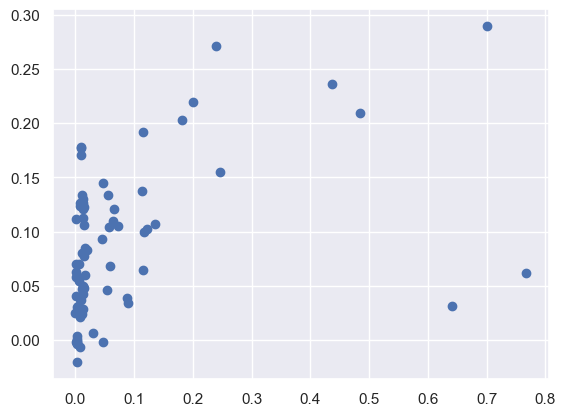

In [64]:
plt.scatter(y_test_MM_scaled,prediction)

Kết quả trả về chỉ ra: 
Đối với bộ số liệu dùng để Training xây dựng được mô hình Linear Regression, các biến đầu vào X(inputs) có khả năng giải thích 16,8% cho sự biến động đầu ra của y(outputs)
Kiểm chứng bằng số liệu Valid cho thấy, mô hình Linear Regression các biến đầu vào X(inputs) có khả năng giải thích 16,85% cho sự biến động đầu ra của y(outputs). 
Như vậy, mô hình có khả năng giải thích cho biến động đầu ra y(outputs) khá thấp, khoảng hơn 16%

# MÔ HÌNH RỪNG CÂY NGẪU NHIÊN (Random Forest Regression)

In [67]:
from sklearn.ensemble import RandomForestRegressor
#n_estimator = 10
forest_reg = RandomForestRegressor(n_estimators = 2, n_jobs=-1).fit(X_train_MM_scaled, y_train_MM_scaled.ravel())

n_estimator: Số lượng cây trong rừng (số lượng cành nhánh trong thuật toán phân cụm Decision Trees). n_estimator số lượng càng cao thì càng chính xác, tuy nhiên khi n_estimator cao thì tăng thêm số lượng thì độ chính xác tăng càng ít.
n_jobs: Số CPU được sử dụng để training và tính toán. n_jobs = -1 nghĩa là sử dụng tất cả CPU mà máy tính có.

In [68]:
print("Train set Random Forest Regression score: {:.4f}".format(forest_reg.score(X_train_MM_scaled, y_train_MM_scaled)))
print("Validation set Random Forest Regression score: {:.4f}".format(forest_reg.score(X_valid_MM_scaled, y_valid_MM_scaled)))

Train set Random Forest Regression score: 0.7869
Validation set Random Forest Regression score: 0.5342


In [69]:
#n_estimator = 100
forest_reg = RandomForestRegressor(n_estimators = 3, n_jobs=-1).fit(X_train_MM_scaled, y_train_MM_scaled.ravel())
print("Train set Random Forest Regression score: {:.4f}".format(forest_reg.score(X_train_MM_scaled, y_train_MM_scaled)))
print("Validation set Random Forest Regression score: {:.4f}".format(forest_reg.score(X_valid_MM_scaled, y_valid_MM_scaled)))

Train set Random Forest Regression score: 0.8776
Validation set Random Forest Regression score: 0.8538


In [70]:
print("Test set Random Forest Regression score: {:.4f}".format(forest_reg.score(X_test_MM_scaled, y_test_MM_scaled)))

Test set Random Forest Regression score: 0.7551


In [71]:
predictions = forest_reg.predict(X_test_MM_scaled)
print(predictions)

[1.72281309e-03 1.99652224e-03 1.13920813e-02 4.03829758e-04
 5.79567502e-04 4.75609838e-02 1.63233228e-01 4.11139821e-01
 5.25235637e-04 3.73413785e-03 6.35161288e-01 1.02240725e-02
 1.13002154e-02 3.70226569e-02 1.03553094e-02 5.90310929e-02
 6.16558318e-02 1.95943904e-02 1.48436130e-02 2.50448624e-03
 2.55172596e-03 1.17595447e-02 2.18746457e-01 2.07105660e-03
 2.02066241e-01 4.50412344e-02 1.12083496e-02 1.32293985e-02
 8.63610540e-03 1.32293985e-02 4.30989276e-02 1.12050819e-01
 9.79101609e-04 4.12222392e-02 1.26650797e-02 7.88805480e-03
 4.38962053e-01 1.99638357e-01 3.53710533e-01 2.47298520e-03
 4.73739844e-01 1.45286443e-02 2.84266369e-02 2.94076464e-01
 5.69444254e-02 1.17694008e-01 4.25182174e-01 6.11308840e-02
 3.90699533e-02 1.64315800e-02 4.30989276e-02 7.46351658e-02
 5.12040121e-03 1.13527102e-02 4.71672729e-02 1.31506564e-02
 1.04078042e-02 1.97709174e-01 5.91453930e-03 5.18563091e-04
 2.49199049e-03 2.26306356e-03 2.34494890e-01 1.99467969e-03
 3.46997630e-02 4.419890

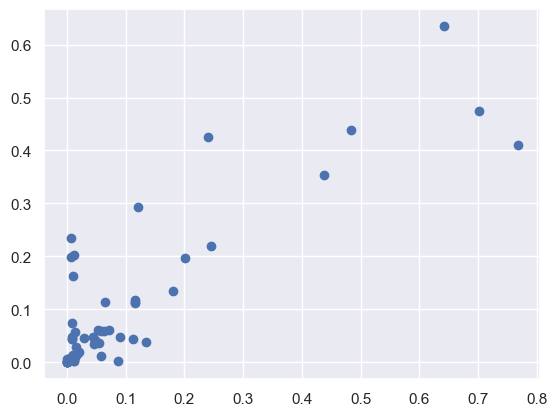

In [72]:
plt.scatter(y_test_MM_scaled,predictions)

Kết quả trả về rất ấn tượng khi n_estimator = 100:

Đối với bộ số liệu dùng để Training xây dựng được mô hình Random Forest Regressor, các biến đầu vào X(inputs) có khả năng giải thích lên tới 86,28% cho sự biến động đầu ra y(outputs)

Tuy nhiên, khi kiểm chứng bằng bộ số liệu Valid cho thấy mô hình Random Forest Regressor, các biến đầu vào X(inputs) có khả năng giải thích chỉ còn 69,97% cho sự biến động đầu ra y(outputs)

Để kiểm định thực tế trí tuệ nhân tạo này sau khi training bằng bộ số liệu Test, kết quả thu được là 74,97% vượt khá xa so với thuật toán Linear Regression

# THUẬT TOÁN GRADIENT BOOTING REGRESSION

In [73]:
#Gọi thuật toán Gradient Booting Regression từ thư viên sklearn
#n_estimators=10
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(n_estimators=10).fit(X_train_MM_scaled, y_train_MM_scaled.ravel())
print("Train set Gradient Booting Regression score: {:.4f}".format(gb_reg.score(X_train_MM_scaled, y_train_MM_scaled)))
print("Validation set Gradient Booting Regression score: {:.4f}".format(gb_reg.score(X_valid_MM_scaled, y_valid_MM_scaled)))

Train set Gradient Booting Regression score: 0.6782
Validation set Gradient Booting Regression score: 0.6670


n_estimation: Số lượng các lần thực hiện tăng cường độ dốc(để tìm ra cực trị), số lần càng cao thường cho kết quả tốt

In [74]:
#n_estimator = 50
gb_reg = GradientBoostingRegressor(n_estimators=50).fit(X_train_MM_scaled, y_train_MM_scaled.ravel())
print("Train set Gradient Booting Regression score: {:.4f}".format(gb_reg.score(X_train_MM_scaled, y_train_MM_scaled)))
print("Validation set Gradient Booting Regression score: {:.4f}".format(gb_reg.score(X_valid_MM_scaled, y_valid_MM_scaled)))

Train set Gradient Booting Regression score: 0.9711
Validation set Gradient Booting Regression score: 0.8770


In [75]:
#n_estimator = 100
gb_reg = GradientBoostingRegressor(n_estimators=100).fit(X_train_MM_scaled, y_train_MM_scaled.ravel())
print("Train set Gradient Booting Regression score: {:.4f}".format(gb_reg.score(X_train_MM_scaled, y_train_MM_scaled)))
print("Validation set Gradient Booting Regression score: {:.4f}".format(gb_reg.score(X_valid_MM_scaled, y_valid_MM_scaled)))

Train set Gradient Booting Regression score: 0.9918
Validation set Gradient Booting Regression score: 0.8669


In [67]:
print("Test set Gradient Booting Regression score: {:.4f}".format(gb_reg.score(X_test_MM_scaled,y_test_MM_scaled)))

Test set Gradient Booting Regression score: 0.8193


In [76]:
predict = gb_reg.predict(X_test_MM_scaled)
print(predict)

[ 1.30525339e-02  1.22333399e-02  1.00145759e-02 -1.12024510e-03
  1.00193989e-03  2.52998431e-02  8.24341381e-02  4.45079044e-01
  2.16191991e-03  8.95464017e-03  6.89052101e-01  3.73316167e-03
  2.30132390e-02  6.28267834e-02  1.90472545e-02  7.08336008e-02
  5.72218021e-02  2.42568029e-02  6.64719764e-03 -1.58294121e-03
 -1.36613544e-03  3.01031902e-02  2.39739269e-01  4.80552856e-02
  1.47425409e-01  3.90726587e-02  2.21837101e-02  1.73841306e-02
  9.02282827e-03  1.73841306e-02  2.49046462e-02  2.52881447e-01
  1.05610287e-02  1.09556355e-02  1.67467651e-02  2.71449301e-02
  5.58217557e-01  1.21338957e-02  5.51856384e-01  1.15832939e-02
  3.78418979e-01  1.60142911e-02  2.54744770e-02  2.03039181e-01
  1.52955368e-02  1.32714201e-01  3.02344733e-01  7.09880351e-02
  5.27049982e-02  2.41237066e-02  5.80028808e-03  1.63401894e-02
  2.08190816e-03  1.53852914e-02  7.29477415e-02  1.04875993e-02
  2.79334117e-02  1.18541576e-01  6.38156311e-04 -3.79878329e-03
  1.56649996e-02  1.30525

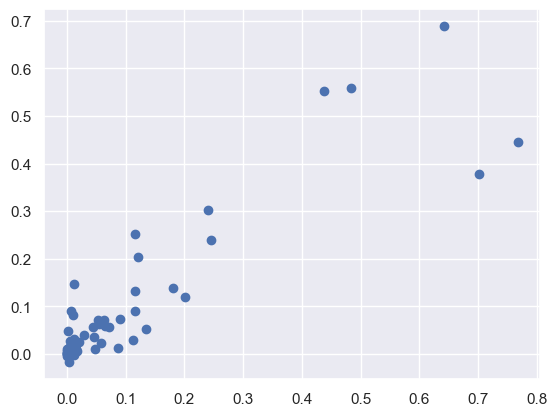

In [77]:
plt.scatter(y_test_MM_scaled,predict)

Kết quả trả về rất ấn tượng với n_estimators=100: Bộ dữ liệu Training là 99,18%, cao hơn hẳn phương pháp Random Forest Regressor, bộ dữ liệu Valid và thử thực tế Test cũng mang kết quả cao hơn rất nhiều với con số lần lượt là 86,04% và 81, 93%

# **Sử Dụng Bộ Dữ Liệu Test Để Kiểm Tra Độ Chính Xác Của Dự Báo**

In [62]:
y_preds = gb_reg.predict(X_test_MM_scaled)
y_preds = scMM_for_y.inverse_transform(y_preds.reshape(-1,1))
y_preds

array([[ 3.32174420e+11],
       [ 3.11367424e+11],
       [ 2.55012258e+11],
       [-2.78049754e+10],
       [ 2.60971469e+10],
       [ 6.43248131e+11],
       [ 2.09442217e+12],
       [ 1.13053676e+13],
       [ 5.55598873e+10],
       [ 2.28090577e+11],
       [ 1.75021250e+13],
       [ 9.54684090e+10],
       [ 5.85169869e+11],
       [ 1.59640808e+12],
       [ 4.84436435e+11],
       [ 1.79977605e+12],
       [ 1.45404519e+12],
       [ 6.16755587e+11],
       [ 1.69483033e+11],
       [-3.95571567e+10],
       [-3.40504305e+10],
       [ 7.65250033e+11],
       [ 6.08987047e+12],
       [ 1.22122161e+12],
       [ 3.74515830e+12],
       [ 9.93068714e+11],
       [ 5.64100373e+11],
       [ 4.42194168e+11],
       [ 2.29822510e+11],
       [ 4.42194168e+11],
       [ 6.33210385e+11],
       [ 6.30357934e+12],
       [ 2.68891804e+11],
       [ 2.78914560e+11],
       [ 4.26005496e+11],
       [ 6.90112144e+11],
       [ 1.41790125e+13],
       [ 3.08841606e+11],
       [ 1.4

In [63]:
print("Test R2 score: {:.4f}".format(r2_score(y_test,y_preds)))

Test R2 score: 0.8183


Tính toán dự báo y_pred thông qua gb_reg, sau đó chuyển đổi trở lại thang đo bình thường sẽ thu được các giá trị dự báo của biến GDP

In [64]:
#So sánh với phương pháp OLS truyền thống
import statsmodels.api as sm
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    GDP   R-squared (uncentered):                   0.328
Model:                            OLS   Adj. R-squared (uncentered):              0.315
Method:                 Least Squares   F-statistic:                              24.41
Date:                Tue, 05 Mar 2024   Prob (F-statistic):                    5.39e-20
Time:                        01:07:24   Log-Likelihood:                         -7733.2
No. Observations:                 255   AIC:                                  1.548e+04
Df Residuals:                     250   BIC:                                  1.549e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Inflation     -3.165e+10   2.83e+10     -1.119      0.264   -8.73e+10     2.4e+10
Exchange Rate -9.758e+07    4.6e+07     -2.120      0.035   -1.88e+08   -6.92e+06
Money Supply   2.035e+10   3.31e+09      6.154      0.000    1.38e+10    2.69e+10
Unemployment   1.124e+11   6.83e+10      1.645      0.101   -2.22e+10    2.47e+11
FDI             -13.5274      4.119     -3.284      0.001     -21.641      -5.414
==============================================================================
Omnibus:                      228.704   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3399.236
Skew:                           3.741   Prob(JB):                         0.00
Kurtosis:                      19.246   Cond. No.                     1.70e+10
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.7e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Hệ số xác định R2 của giá trị dự báo và giá trị thực tế là 0.8183 khá gần đến 1 là phương pháp dự báo tốt đối với dự báo kinh tế, cao hơn rất nhiều 0,328 của phương pháp thống kê truyền thống OLS.

# **MÁY VECTOR HỖ TRỢ**

In [68]:
from sklearn.svm import SVR
svm1 = SVR(kernel='rbf')
svm1.fit(X_train,y_train)


SVR()

In [69]:
svm1_pred = svm1.predict(X_test)

In [70]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, svm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, svm1_pred))


MAE: 1799146151379.2883
RMSE: 4234417824261.1636
R2_Score:  -0.15541226811193476


Kết quả mô hình trả về không được tốt lắm khi R2 = -0,1554, thấp hơn rất nhiều so với các phương pháp trên